In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf

from tensorflow  import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
from pathlib import Path
data_dir = Path(data_dir)
data_dir


WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

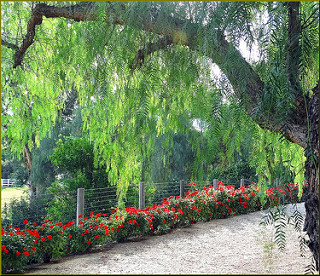

In [7]:
PIL.Image.open(str(roses[5]))

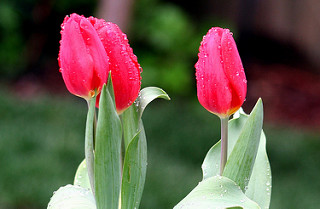

In [8]:
tulips = list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(str(tulips[0]))

#### Create class names for the flowers


In [9]:
#Create a dictionary of different flowers and all the image paths associated with it
flowers_image_dict = {
     'roses': list(data_dir.glob('roses/*')),
     'daisy': list(data_dir.glob('daisy/*')),
     'dandelion':list(data_dir.glob('dandelion/*')),
     'sunflowers':list(data_dir.glob('sunflowers/*')),
     'tulips':list(data_dir.glob('tulips/*')),
 }

In [10]:
#flowers_image_dict['daisy']

In [11]:
#Assign class numbers to each of the flowers
flowers_label_dict:{
    'roses':0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers':3,
    'tulips': 4,
}

In [12]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [13]:
img.shape

(240, 179, 3)

In [14]:
#Resize the image to a standard size since the images are of different sizes

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
#create a for loop to get the names ans the number of flowers in the flowers_image_dict
X,y =[],[]

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])  

NameError: name 'flowers_label_dict' is not defined